## Import Library yang dibutuhkan

In [ ]:
#Import library yang dibutuhkan 
#Importing General packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

## File Unloading

In [ ]:
#import dataset
df_load = pd.read_csv('/content/Churn_Modelling.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.CustomerId.nunique())

(10000, 14)
   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]
10000


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploratory Data Analysis

### Memvisualisasikan Prosentase Churn

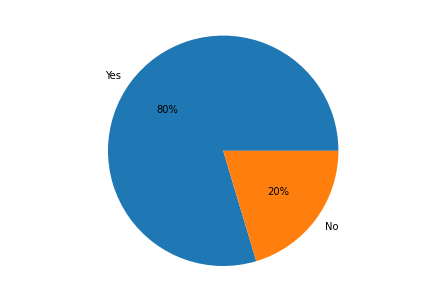

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Exited.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### Exploratory Data Analysis (EDA) Variabel Numerik

In [ ]:
df_load.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


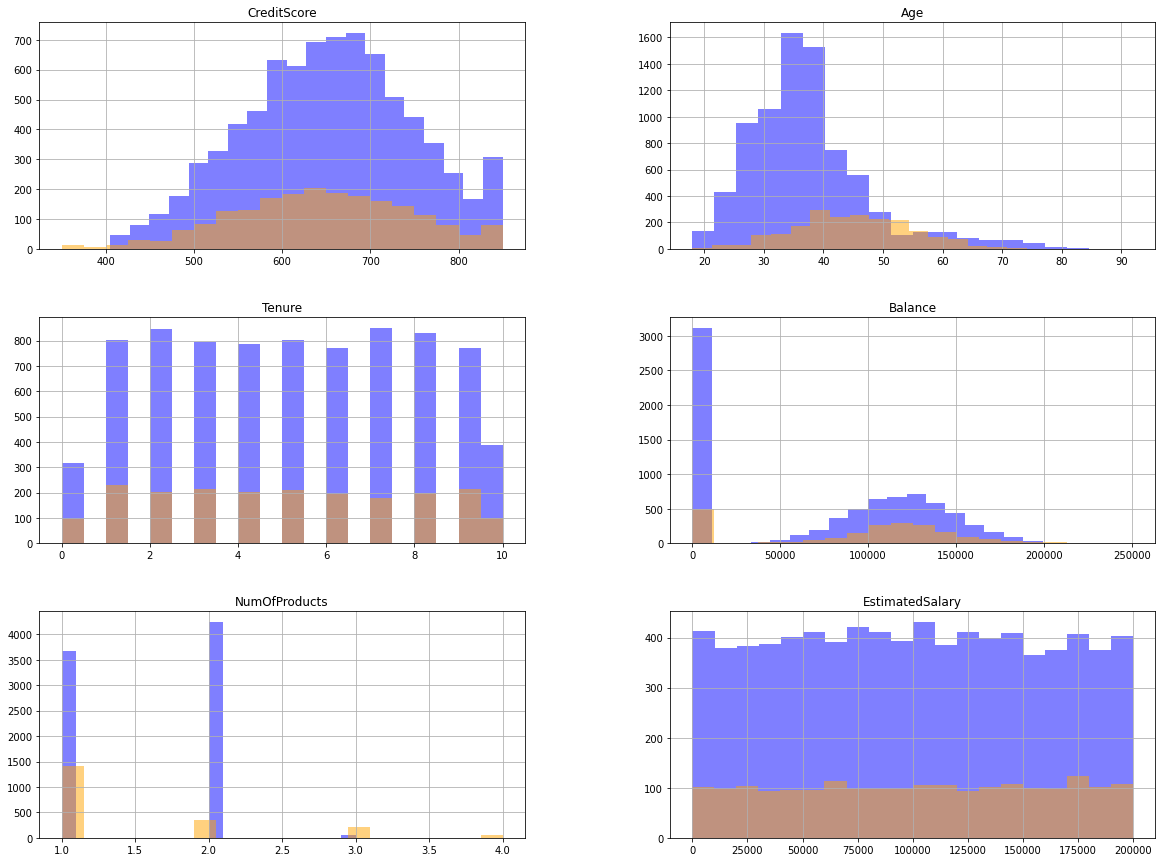

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#creating bin in chart
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Exited == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Exited == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

In [ ]:
df_load.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis (EDA) Variabel Kategorik

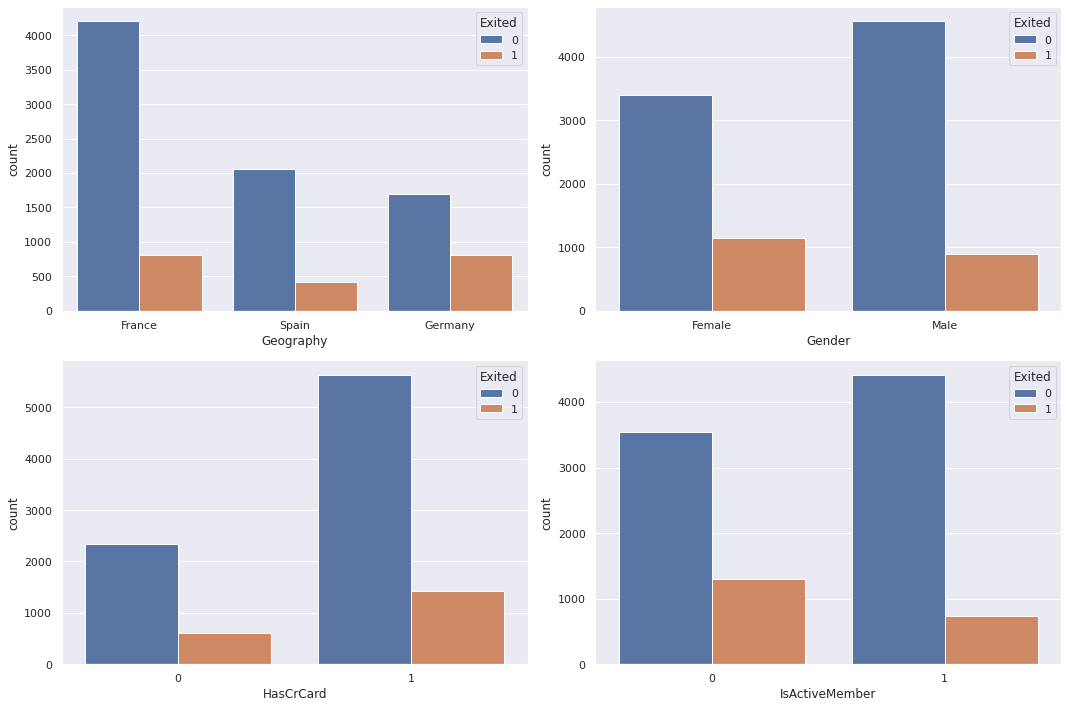

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data=df_load, x='Geography', hue='Exited', ax=ax[0][0])
sns.countplot(data=df_load, x='Gender', hue='Exited', ax=ax[0][1])
sns.countplot(data=df_load, x='HasCrCard', hue='Exited', ax=ax[1][0])
sns.countplot(data=df_load, x='IsActiveMember', hue='Exited', ax=ax[1][1])
plt.tight_layout()
plt.show()

### Memfilter Duplikasi ID Number Pelanggan

In [ ]:
f'Jumlah duplicated values = {df_load.duplicated().sum()}'

'Jumlah duplicated values = 0'

### Mengatasi Missing Values dengan Penghapusan Rows

In [ ]:
df_load.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Menghapus Unnecessary Columns dari data

In [ ]:
df_load.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Persebaran data sebelum ditangani Outlier: 
        CreditScore           Age        Balance  EstimatedSalary
count  10000.000000  10000.000000   10000.000000     10000.000000
mean     650.528800     38.921800   76485.889288    100090.239881
std       96.653299     10.487806   62397.405202     57510.492818
min      350.000000     18.000000       0.000000        11.580000
25%      584.000000     32.000000       0.000000     51002.110000
50%      652.000000     37.000000   97198.540000    100193.915000
75%      718.000000     44.000000  127644.240000    149388.247500
max      850.000000     92.000000  250898.090000    199992.480000


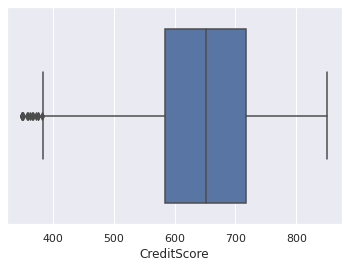

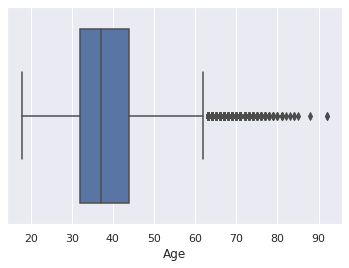

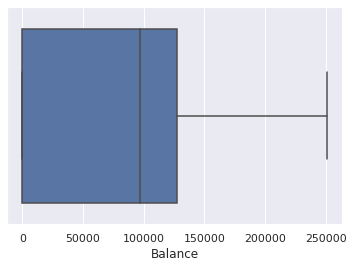

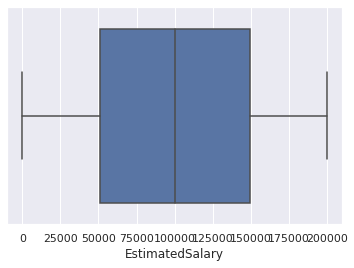

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['CreditScore','Age','Balance','EstimatedSalary']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['CreditScore'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['Age'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['Balance'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['EstimatedSalary'])
plt.show()

In [ ]:
# Handling with IQR
Q1 = (df_load[['CreditScore','Age','Balance','EstimatedSalary']]).quantile(0.25)
Q3 = (df_load[['CreditScore','Age','Balance','EstimatedSalary']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['CreditScore','Age','Balance','EstimatedSalary']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
CreditScore           919.00000
Age                    62.00000
Balance            319110.60000
EstimatedSalary    296967.45375
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
CreditScore           383.00000
Age                    14.00000
Balance           -191466.36000
EstimatedSalary    -96577.09625
dtype: float64

Persebaran data setelah ditangani Outlier: 
        CreditScore           Age        Balance  EstimatedSalary
count  10000.000000  10000.000000   10000.000000     10000.000000
mean     650.561300     38.660800   76485.889288    100090.239881
std       96.558702      9.746704   62397.405202     57510.492818
min      383.000000     18.000000       0.000000        11.580000
25%      584.000000     32.000000       0.000000     51002.110000
50%      652.000000     37.000000   97198.540000    100193.915000
75%      718.000000     44.000000  127644.240000    149388.247500
max      850.000000     62.000000  250

In [ ]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['RowNumber','CustomerId','Surname'], axis=1)
cleaned_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,249.594300,0.746300,0.545700,20.660800,5.012800,76485.889288,0.530200,0.70550,0.515100,100090.239881,0.203700
std,96.470603,0.827529,0.497932,9.746704,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,183.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,251.000000,0.000000,1.000000,19.000000,5.000000,97198.540000,0.000000,1.00000,1.000000,100193.915000,0.000000
75%,317.000000,1.000000,1.000000,26.000000,7.000000,127644.240000,1.000000,1.00000,1.000000,149388.247500,0.000000
max,449.000000,2.000000,1.000000,44.000000,10.000000,250898.090000,3.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
cleaned_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,218,0,0,24,2,0.00,0,1,1,101348.88,1
1,207,2,0,23,1,83807.86,0,0,1,112542.58,0
2,101,0,0,24,8,159660.80,2,1,0,113931.57,1
3,298,0,0,21,1,0.00,1,0,0,93826.63,0
4,449,2,0,25,2,125510.82,0,1,1,79084.10,0


### Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
# Predictor dan target
x = cleaned_df.drop('Exited', axis = 1)
y = cleaned_df['Exited']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah: (7000, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (7000,)
Prosentase Churn di data Training adalah:
0    0.792429
1    0.207571
Name: Exited, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (3000, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (3000,)
Prosentase Churn di data Testing adalah:
0    0.805333
1    0.194667
Name: Exited, dtype: float64


### Pembuatan Model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Performansi Model Training - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      5547
           1       0.39      0.08      0.14      1453

    accuracy                           0.78      7000
   macro avg       0.59      0.52      0.51      7000
weighted avg       0.71      0.78      0.72      7000



### Performansi Model Training - Menampilkan Plots

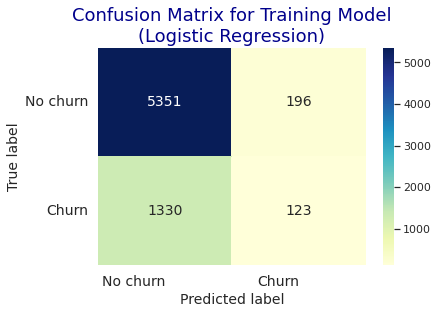

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Data Testing - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2416
           1       0.41      0.11      0.17       584

    accuracy                           0.80      3000
   macro avg       0.61      0.53      0.53      3000
weighted avg       0.74      0.80      0.74      3000



### Performansi Data Testing - Menampilkan Plots

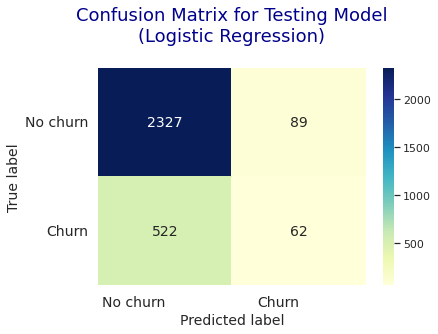

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Pembuatan Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Performansi Data Training - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



### Performansi Data Training - Menampilkan Plots

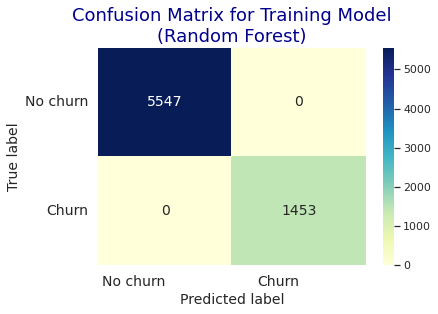

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Data Testing - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



### Performansi Data Testing - Menampilkan Plots

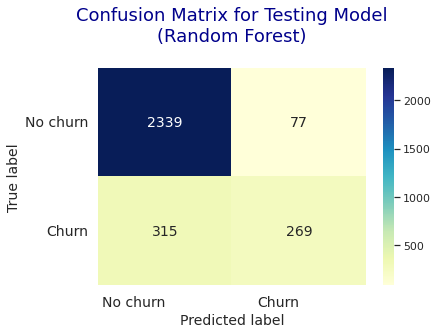

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Pembuatan Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Perfomansi Model Data Training - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.81      0.49      0.61      1453

    accuracy                           0.87      7000
   macro avg       0.84      0.73      0.76      7000
weighted avg       0.86      0.87      0.86      7000



### Perfomansi Model Data Training - Menampilkan Plots

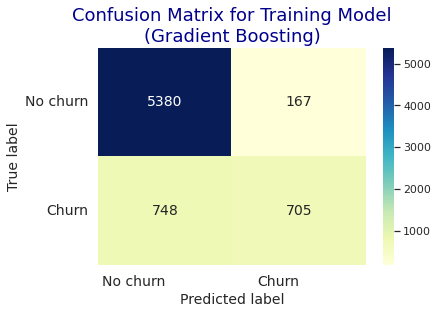

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Model Data Testing - Menampilkan Metrics

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2416
           1       0.41      0.11      0.17       584

    accuracy                           0.80      3000
   macro avg       0.61      0.53      0.53      3000
weighted avg       0.74      0.80      0.74      3000



### Performansi Model Data Testing - Menampilkan Plots

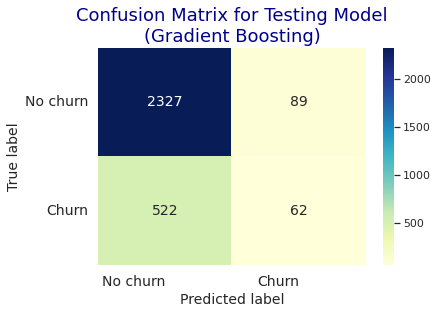

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### ANN Modelling

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, activation='relu',input_dim = 10))
classifier.add(Dropout(0.2, input_shape=(6,)))

# Adding the second hidden layer
classifier.add(Dense(units = 10,activation='relu'))
classifier.add(Dropout(0.2, input_shape=(10,)))

# Adding the third hidden layer
classifier.add(Dense(units = 20,activation='relu'))
classifier.add(Dropout(0.2, input_shape=(29,)))

# Adding the output layer
classifier.add(Dense(units = 1,  activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
churn_model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 9096.0059 - accuracy: 0.5707 - val_loss: 1275.9714 - val_accuracy: 0.7893
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 1556.8748 - accuracy: 0.6581 - val_loss: 144.0155 - val_accuracy: 0.6387
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 552.1590 - accuracy: 0.6547 - val_loss: 35.1880 - val_accuracy: 0.7157
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 232.1147 - accuracy: 0.6852 - val_loss: 0.9108 - val_accuracy: 0.7893
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 132.9676 - accuracy: 0.7562 - val_loss: 0.6782 - val_accuracy: 0.7893
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 64.4741 - accuracy: 0.7328 - val_loss: 0.5460 - val_accuracy: 0.7893
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 17.1645 - accuracy: 0.7274 - val_loss: 1.7837 - 

In [ ]:
print(churn_model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


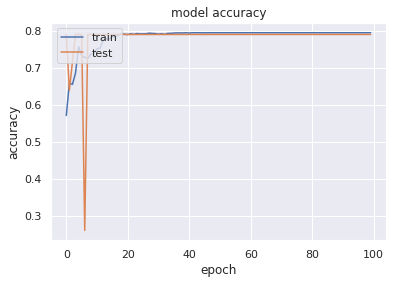

In [ ]:
# summarize history for accuracy
plt.plot(churn_model_history.history['accuracy'])
plt.plot(churn_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

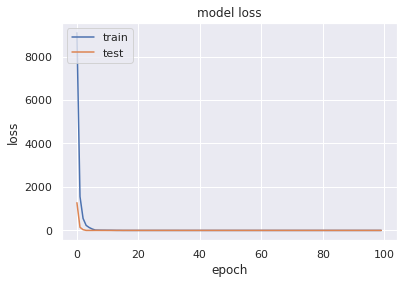

In [ ]:
# summarize history for loss
plt.plot(churn_model_history.history['loss'])
plt.plot(churn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2416,    0],
       [ 584,    0]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score*100, '%')

80.53333333333333 %


### Menentukan Algoritma Model Terbaik

In [ ]:
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
